In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime

In [14]:
obs_da = xr.open_dataset('sos_EB_01Nov2022to18June2023.nc')

summa_da = xr.open_dataset('template_output_consettl_1hr_timestep.nc')
obs_da

<xarray.Dataset> Size: 6MB
Dimensions:         (time: 5520)
Coordinates:
  * time            (time) datetime64[ns] 44kB 2022-11-01 ... 2023-06-18T23:0...
Data variables: (12/259)
    P_10m_d         (time) float32 22kB ...
    Vtherm_ue       (time) float32 22kB ...
    tc_3m_uw        (time) float32 22kB ...
    spd_10m_d       (time) float32 22kB ...
    Tsoil_31_9cm_d  (time) float32 22kB ...
    tc_3m_c         (time) float32 22kB ...
    ...              ...
    Tsurf_rad_uw    (time) float32 22kB ...
    Tsurf_c         (time) float32 22kB ...
    Tsurf_d         (time) float32 22kB ...
    Tsurf_ue        (time) float32 22kB ...
    Tsurf_uw        (time) float32 22kB ...
    ro              (time) float32 22kB ...
Attributes:
    history:                   Created: 2022-11-01 00:05:06 +0000\n
    NIDAS_version:             v1.2-1671
    calibration_file_path:     /h/eol/isfs/isfs/projects/SOS/ISFS/cal_files/n...
    project_config:            /h/eol/isfs/isfs/projects/SOS/ISFS/config/sos....
    wind3d_horiz_coordinates:  geographic
    file_length_seconds:       86400
    wind3d_horiz_rotation:     1
    wind3d_tilt_correction:    0

In [3]:
summa_da = summa_da.sel(time=slice('2022-12-01', '2023-04-01'))
obs_da = obs_da.sel(time=slice('2022-12-01', '2023-04-01'))


In [4]:
obs_da_Tsurf= obs_da['Tsurf_d'].where((obs_da['Tsurf_d'] >= -40) & (obs_da['Tsurf_d'] <= 0), np.nan)


In [5]:
Tsfc_diff = summa_da['scalarSurfaceTemp'] - obs_da_Tsurf - 273.15

(-40.0, 5.0)

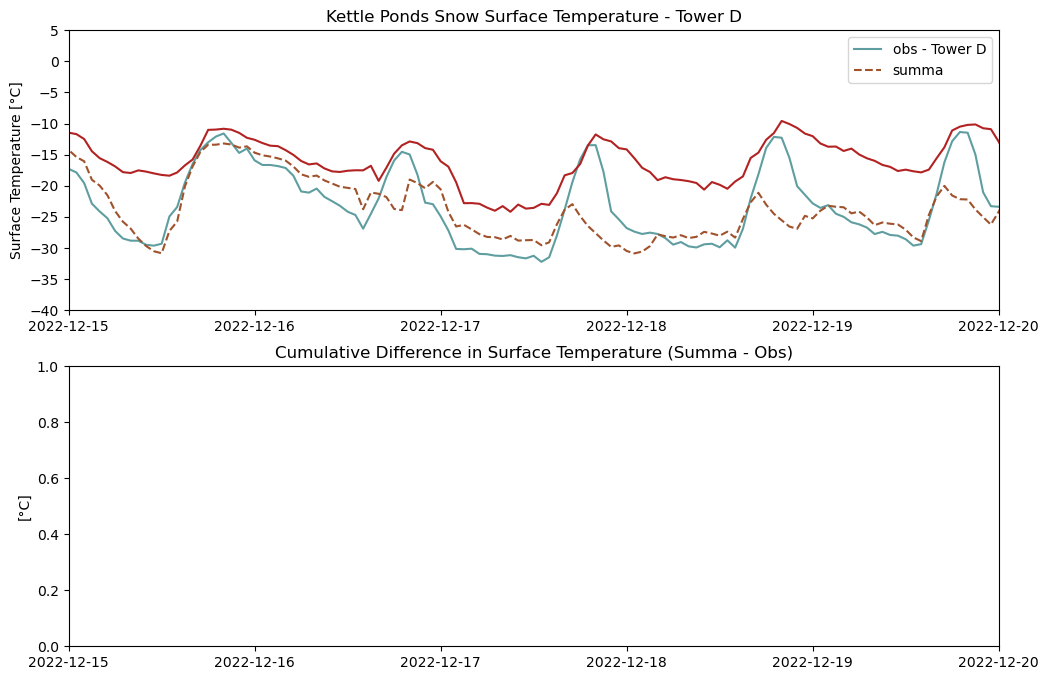

In [10]:
fig, ax = plt.subplots(2,1,figsize=(12, 8))

ax[0].plot(obs_da_Tsurf['time'], obs_da_Tsurf, color='cadetblue', label='obs - Tower D')
ax[0].plot(summa_da['time'], summa_da['scalarSurfaceTemp']-273.15, linestyle='--', color='sienna', label='summa')
ax[0].legend()
ax[0].set_ylabel('Surface Temperature [°C]')
ax[0].set_title('Kettle Ponds Snow Surface Temperature - Tower D')
start_date = datetime(2022, 12, 15)
end_date = datetime(2022, 12, 20)
ax[0].set_xlim(start_date, end_date)


# ax[1].plot(Tsfc_diff.time, Tsfc_diff.cumsum(), color='firebrick')
ax[0].plot(obs_da['time'], obs_da['T_3m_c'], color='firebrick')
ax[1].set_ylabel('[°C]')
ax[1].set_title('Cumulative Difference in Surface Temperature (Summa - Obs)')
ax[1].set_xlim(start_date, end_date)

ax[0].set_ylim(-40,5)

(-0.1, 0.0)

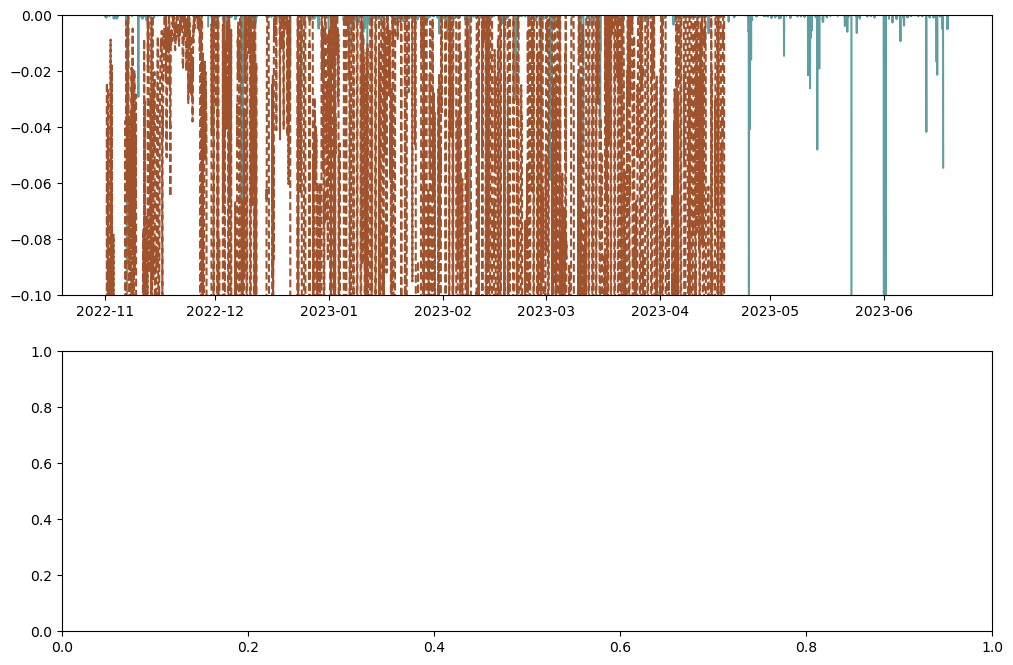

In [23]:
# Plot sensible heat flux

fig, ax = plt.subplots(2,1,figsize=(12, 8))

ax[0].plot(obs_da['time'], obs_da['w_h2o__3m_ue'], color='cadetblue', label='obs')
ax[0].plot(summa_da['time'], summa_da['scalarLatHeatTotal']/100, linestyle='--', color='sienna', label='summa')
ax[0].set_ylim(-.1,0)

In [19]:
summa_da

<xarray.Dataset> Size: 27MB
Dimensions:                    (time: 4081, hru: 1, gru: 1, midToto: 109,
                                midSoil: 9, ifcToto: 110)
Coordinates:
  * time                       (time) datetime64[ns] 33kB 2022-11-01 ... 2023...
  * hru                        (hru) int64 8B 1001
  * gru                        (gru) int64 8B 1001
Dimensions without coordinates: midToto, midSoil, ifcToto
Data variables: (12/51)
    pptrate                    (time, hru) float64 33kB ...
    airtemp                    (time, hru) float64 33kB ...
    SWRadAtm                   (time, hru) float64 33kB ...
    LWRadAtm                   (time, hru) float64 33kB ...
    averageInstantRunoff       (time, gru) float64 33kB ...
    averageRoutedRunoff        (time, gru) float64 33kB ...
    ...                         ...
    scalarSoilBaseflow         (time, hru) float64 33kB ...
    scalarAquiferBaseflow      (time, hru) float64 33kB ...
    scalarTotalRunoff          (time, hru) float64 33kB ...
    scalarNetRadiation         (time, hru) float64 33kB ...
    hruId                      (hru) int64 8B ...
    gruId                      (gru) int64 8B ...
Attributes: (12/34)
    summaVersion:     v3.1.2
    buildTime:        Fri 10 Feb 2023 02:32:58 PM UTC
    gitBranch:        master-0-gfa9adf8
    gitHash:          fa9adf808229a45085defdc2bb8ef05836b9b3aa
    soilCatTbl:       ROSETTA
    vegeParTbl:       MODIFIED_IGBP_MODIS_NOAH
    ...               ...
    compaction:       consettl
    thCondSnow:       tyen1965
    thCondSoil:       funcSoilWet
    spatial_gw:       localColumn
    subRouting:       timeDlay
    snowDenNew:       pahaut_76